In [1]:
import pyupbit
kr_coin = pyupbit.get_tickers(fiat = "KRW")
print(kr_coin)

c:\anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC', 'KRW-XRP', 'KRW-ETC', 'KRW-OMG', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-REP', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLY', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-MFT', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-SRM', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 

In [2]:
import mplfinance as mpf
chart = [] #차트 저장을 위한 리스트
target = [] #타겟 저장을 위한 리스트
mc = mpf.make_marketcolors(up='r',down='b', volume = 'g', wick = 'inherit') #차트 색 설정
s  = mpf.make_mpf_style(marketcolors=mc, figcolor = 'black') #차트 스타일 설정

In [8]:
import datetime
def chart_create(coin, interval, count, year, month, day, figratio): #차트 생성 함수(코인명, 간격, 데이터 갯수, 시작 년, 월, 일)
    day = datetime.datetime(year, month, day)
    if "day" in interval:
        plus = datetime.timedelta(days = count)
    if "minute" in interval:
        plus = datetime.timedelta(minutes = count)
    while True:
        to = day.strftime("%Y%m%d %H:%M:%S")
        btc = pyupbit.get_ohlcv(ticker = coin, interval = interval, to = to, count = count)
        mpf.plot(btc, type = 'candle',volume = True, figratio = figratio, tight_layout = True, style = s, axisoff = True, savefig = day.strftime("%Y%m%d%H%M%S"))
        day += plus
        if day == datetime.datetime.today().strftime("%Y%m%d %H:00:00"):
            return

In [11]:
import time
import os
target = []
# 1:급락 2:상승 3:보합 4:하락 5:급락
def target_create(coin, location, interval, count):
    global target
    file_list = os.listdir(location)
    file_name = []
    for file in file_list:
        if file.count(".") == 1: 
            name = file.split('.')[0]
            file_name.append(name)
    if "day" in interval:
        plus = datetime.timedelta(days = count)
    if "minute" in interval:
        plus = datetime.timedelta(minutes = count)
        
    for i in file_name:
        day = datetime.datetime(int(i[0:4]), int(i[4:6]), int(i[6:8]), int(i[8:10]), int(i[10:12]), int(i[12::]))
        time.sleep(0.05)
        btc = pyupbit.get_ohlcv(ticker = coin, interval = interval, to = day + datetime.timedelta(minutes = 1), count = count+1)
        origin_day = btc['close'][0]
        target_day = btc['close'][-1]
        if (target_day - origin_day)/origin_day >= 0.01:
            target.append(1)
        elif (target_day - origin_day)/origin_day <= -0.01:
            target.append(5)
        elif (target_day - origin_day)/origin_day >= -0.005 and (target_day - origin_day)/origin_day <= 0.005:
            target.append(3)
        elif (target_day-origin_day)/origin_day > 0.005:
            target.append(2)
        elif (target_day-origin_day)/origin_day < -0.005:
            target.append(4)
        print(len(target))
        day += plus            

In [ ]:
target_create("KRW-BTC", "BTC_minute1", "minute1", 60)

In [18]:
#타겟 분포 확인
import matplotlib.pyplot as plt
def check_target(target):
    target_name = ['급등', '상승', '보합', '하락', '급락']
    for i in range(1, 6):
        print(target_name[i-1] + ' : ' + str(target.count(i)/len(target)))      
        print(target.count(i))
check_target(target)

상승 : 0.02912280701754386
83
하락 : 0.09614035087719298
274
보합 : 0.7498245614035087
2137
하락 : 0.0887719298245614
253
급락 : 0.03614035087719298
103


In [16]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split, SubsetRandomSampler, ConcatDataset
import torchvision.transforms as transforms
import numpy as np
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


In [46]:
from PIL import Image
os.chdir('..')
file_list = os.listdir("BTC_minute1")
os.chdir("BTC_minute1")
chart = []
for file in file_list:
    f = Image.open(file)
    f_resize = f.resize((224, 224)) #리사이즈, 기본으로 Nearest 사용
    f_resize = np.array(f)[:, :, :3] #Png FIle이 4차원 투명도를 가지고 있으므로 :3으로 4차원 제거
    chart.append(f_resize)

UnidentifiedImageError: cannot identify image file 'Project.ipynb'

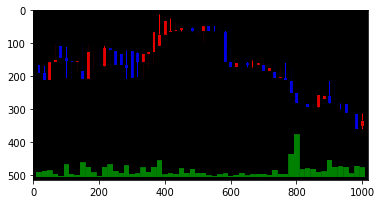

In [47]:
#이미지 확인
plt.imshow(chart[-1])

In [9]:
#tensor로 변환
#data_ts = torch.tensor(chart, dtype = torch.float32)
#target_ts = torch.tensor(target, dtype = torch.float32)
#Data save
#torch.save(target_ts, 'data.pt')
#torch.save(data_ts, 'target.pt')
import pickle
data_dict = {'data' :chart, 'target':target}
with open('data_dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [10]:
os.chdir('BTC_minute1')
with open("data_dict.pkl","rb") as fr:
    data = pickle.load(fr)

In [17]:
target = np.array(data['target'], dtype = np.int64)
target_list = [i for i in range(1,6)]
for i, l in enumerate(target_list):
      target[target==l] = i
def _to_one_hot(y, num_classes):
    scatter_dim = len(y.size())
    y_tensor = y.view(*y.size(), -1)
    zeros = torch.zeros(*y.size(), num_classes, dtype=y.dtype)
    return zeros.scatter(scatter_dim, y_tensor, 1)
target = _to_one_hot(torch.as_tensor(target), num_classes=5)

In [ ]:
chart = torch.tensor(data['data'], dtype = torch.float32)

In [ ]:
from sklearn import model_selection
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(chart, target , test_size=0.2)
train = torch.utils.data.TensorDataset(train_X,train_Y)
test = torch.utils.data.TensorDataset(test_X,test_Y)

In [ ]:
import torchvision.transforms as transforms
from torchvision import models
resnet50 = models.resnet50(pretrained = True)
for param in resnet50.parameters(): #Freezing
  param.required_gard = False

num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 5).to(DEVICE)  

In [1]:
# parameter
args = {
	'BATCH_SIZE': 32,
        'LEARNING_RATE': 0.01,
        'NUM_EPOCH': 25
        }
optimizer = optim.Adam(resnet50.parameters(), lr = args['LEARNING_RATE'])
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch,
                                        last_epoch=-1,
                                        verbose=False)
loss_function = nn.CrossEntropyLoss().to(DEVICE)

NameError: name 'optim' is not defined

In [ ]:
import torch.utils.data as Data
train_loader = Data.DataLoader(dataset=train, 
                               batch_size=args['BATCH_SIZE'], 
                               shuffle=True)

In [ ]:
resnet50 = resnet50.to(DEVICE)
for epoch in range(args['NUM_EPOCH']):
    resnet50.train()
    for step, (chart, target) in enumerate(train_loader):
        optimizer.zero_grad()
        chart = chart.permute(0, 3, 1, 2)
        chart = chart.to(DEVICE)
        target = target.to(DEVICE)
        outputs = resnet50(chart)
        target = torch.argmax(target, dim = 1)
        train_loss = loss_function(outputs, target)
        train_loss.backward()
        optimizer.step()
    scheduler.step()
    total = 0
    correct = 0
    accuracy = []
    resnet50.eval()
    with torch.no_grad():
      for chart_t, target_t in test:
        chart_t = chart_t.permute(2, 0, 1)
        chart_t = chart_t.unsqueeze(0)
        chart_t = chart_t.to(DEVICE)
        outputs = resnet50(chart_t)
        target_t = target_t.reshape(1,3)
        target_t = target_t.to(DEVICE)
        target_t = torch.argmax(target_t, dim = 1)
        temp = list(outputs.data[0].to('cpu').numpy())
        temp2 = sorted(temp)
        predicted, predicted1 = temp.index(temp2[-1]), temp.index(temp2[-2])
        total += target_t.size(0)
        correct += (predicted == target_t or predicted1 == target_t).sum().item()
        test_loss = loss_function(outputs, target_t).item()
        accuracy.append(100 * correct/total)
    print('Epoch: %d/%d, Train loss: %.6f, Test loss: %.6f, Accuracy: %.2f' %(epoch+1, args['NUM_EPOCH'], train_loss.item(), test_loss, 100*correct/total),outputs.data, target_t, target_t.size(0))

